In [26]:
# this code is for SIFT (Scale-Invariant Feature Transform)
# the original code is from https://github.com/bhaswara/CV_24T3/tree/main, created by Irfan Dwiki Bhaswara
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Read image
image = cv2.imread('s1.jpg')

(-0.5, 1245.5, 699.5, -0.5)

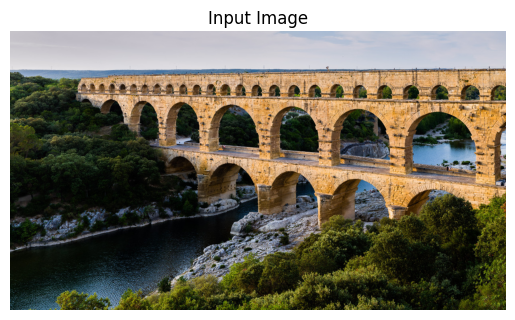

In [28]:
#Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

In [29]:
'''
Setting SIFT parameters 
nfeatures -> How many keypoints you want to include
contrastThreshold -> How sensitive the detector is to low contrast regions

'''
sift = cv2.SIFT_create(nfeatures=30)

#Apply SIFT
keypoints, descriptors = sift.detectAndCompute(image, None)

# keypoints = sift.detect(image, None)
# keypoints, descriptors = sift.compute(image, keypoints)


In [31]:
#Inside Keypoints
count = 0
for kp in keypoints:
    x,y = kp.pt
    print('x:', round(x, 2), 'y:', round(y, 2))
    count += 1

print('nfeatures:', count)

x: 569.33 y: 249.06
x: 1236.69 y: 384.83
x: 1236.69 y: 384.83
x: 1009.16 y: 154.65
x: 1009.16 y: 154.65
x: 283.11 y: 140.43
x: 1119.66 y: 330.39
x: 285.38 y: 186.83
x: 721.2 y: 257.75
x: 1178.54 y: 331.13
x: 289.41 y: 207.37
x: 857.59 y: 113.36
x: 537.07 y: 541.6
x: 857.59 y: 113.36
x: 620.06 y: 528.27
x: 506.49 y: 322.07
x: 1067.48 y: 402.62
x: 1079.13 y: 155.11
x: 378.23 y: 217.01
x: 378.23 y: 217.01
x: 564.88 y: 564.61
x: 506.49 y: 322.07
x: 1140.2 y: 331.68
x: 650.21 y: 220.11
x: 650.21 y: 220.11
x: 650.21 y: 220.11
x: 506.49 y: 322.07
x: 957.48 y: 463.73
x: 957.48 y: 463.73
x: 213.71 y: 692.92
nfeatures: 30


In [32]:
#Inside descriptors
'''
Descriptors -> a collection of SIFT descriptors, one for each detected keypoint
Each descriptors has 128-dimensional vector. It holds gradient magnitude and orientation around corresponding keypoints
'''
print(descriptors)
print('shape:', descriptors.shape)

[[107.  18.   5. ...  20.  22.  32.]
 [  2.  13.  41. ...   1.   1.   2.]
 [  2.   2.   2. ...  14.  60.   2.]
 ...
 [ 22.  19.   7. ...   1.   0.   0.]
 [ 40.  20.  17. ...   1.   0.   0.]
 [  4.   2.   3. ...   3.   0.   0.]]
shape: (30, 128)


In [36]:
#Draw Keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0,0,255))

(-0.5, 1245.5, 699.5, -0.5)

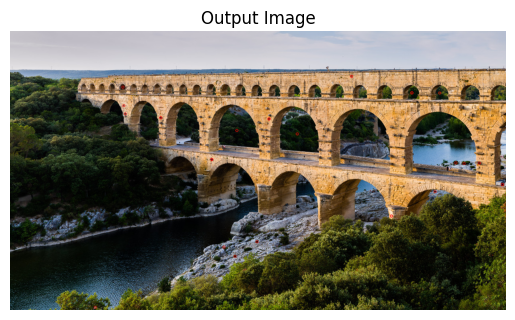

In [37]:
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Output Image')
plt.axis('off')

In [38]:
def draw_custom_keypoints(img, keypoints, color, mode="circle", size=10, thickness=1):
    """
    Draws custom keypoints on the image.

    Parameters:
        img (numpy.ndarray): Input image.
        keypoints (list of cv2.KeyPoint): List of keypoints detected by SIFT or other detectors.
        color (tuple): BGR color for the keypoints.
        mode (str): Drawing mode, either "marker" or "circle" (default: "circle").
        size (int): Marker size or circle radius.
        thickness (int): Thickness of the marker lines (ignored for filled circles).

    Returns:
        numpy.ndarray: Image with drawn keypoints.
    """
    # Copy the image to avoid modifying the original
    img_copy = img.copy()
    
    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])  # Extract (x, y) coordinates of the keypoint
        if mode == "marker":
            cv2.drawMarker(img_copy, (x, y), color, markerType=cv2.MARKER_STAR, markerSize=size, thickness=thickness)
        elif mode == "circle":
            cv2.circle(img_copy, (x, y), radius=size, color=color, thickness=-1)
    
    return img_copy

(-0.5, 1245.5, 699.5, -0.5)

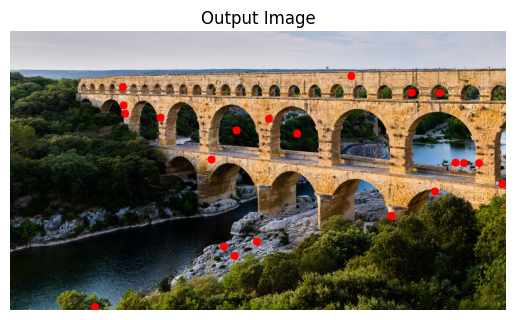

In [39]:
img_with_keypoints = draw_custom_keypoints(image, keypoints, (0,0,255))

plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Output Image')
plt.axis('off')